<a href="https://colab.research.google.com/github/olfabre/AMS-Application-BI-V2/blob/main/AMS-Application-BI-V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse des associations

B1 - numériques entre numériques

In [1]:
from google.colab import files
import pandas as pd

# Upload du fichier CSV depuis ton ordinateur
uploaded = files.upload()

# Récupération du nom du fichier
filename = list(uploaded.keys())[0]

# Lecture du CSV dans un DataFrame pandas
df = pd.read_csv(filename)

# Aperçu des premières lignes
df.head()


Saving ks-projects-cleaned-state.csv to ks-projects-cleaned-state.csv


,id,name,category,subcategory,country,sex,age,start_date,end_date,currency,goal_usd,pledged_usd,backers,state
0,149450711,Abilities Rock,Art,Art,US,male,26,2015-11-17 19:37:50,2015-12-17 19:37:50,USD,10000.0,0.0,0,failed
1,356418410,De'VIA Elders Reunion,Art,Art,US,female,26,2016-03-21 22:18:52,2016-04-23 04:00:00,USD,7500.0,958.0,15,failed
2,412253775,Help C.B. Farr make a documentary about becomi...,Art,Art,US,female,28,2013-06-05 08:30:31,2013-07-05 08:30:31,USD,20000.0,0.0,0,failed
3,477821027,The London Aesthetifest,Art,Art,US,female,27,2014-06-24 19:49:35,2014-07-15 04:05:00,USD,7800.0,1000.0,15,failed
4,350951514,Hobo Nickels across the nation,Art,Art,US,male,22,2015-10-02 16:00:42,2015-11-01 16:00:42,USD,2621.0,392.0,6,failed


=== CORRÉLATIONS PEARSON ===
                  age  goal_usd  pledged_usd   backers
age          1.000000  0.087336     0.047404  0.040582
goal_usd     0.087336  1.000000     0.007380  0.006429
pledged_usd  0.047404  0.007380     1.000000  0.765480
backers      0.040582  0.006429     0.765480  1.000000

=== CORRÉLATIONS SPEARMAN ===
                  age  goal_usd  pledged_usd   backers
age          1.000000  0.646598     0.065103  0.025859
goal_usd     0.646598  1.000000     0.184123  0.112987
pledged_usd  0.065103  0.184123     1.000000  0.959455
backers      0.025859  0.112987     0.959455  1.000000


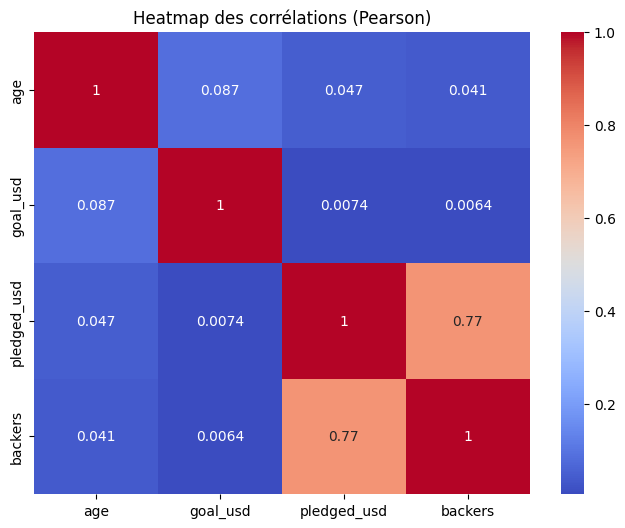

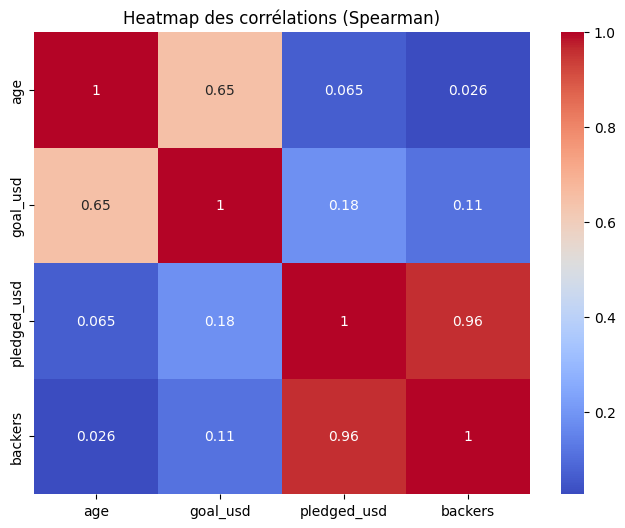

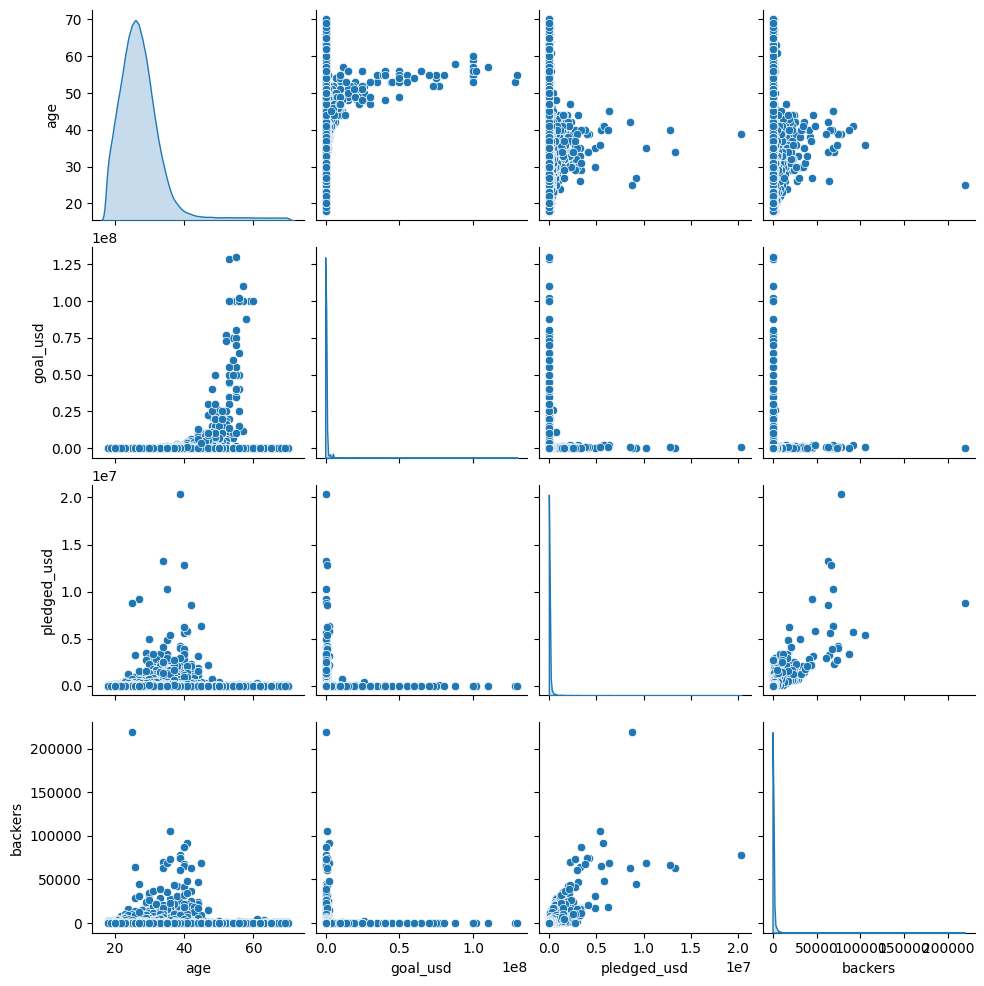

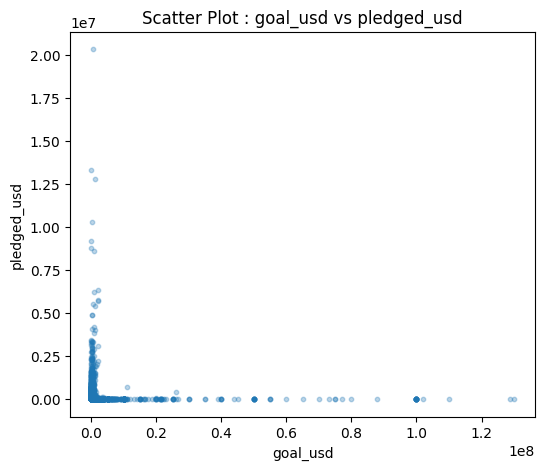

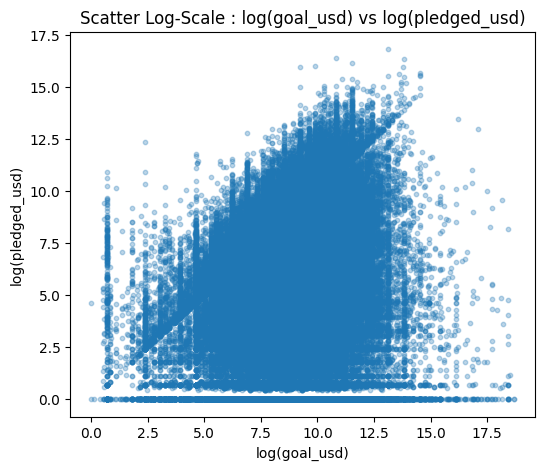

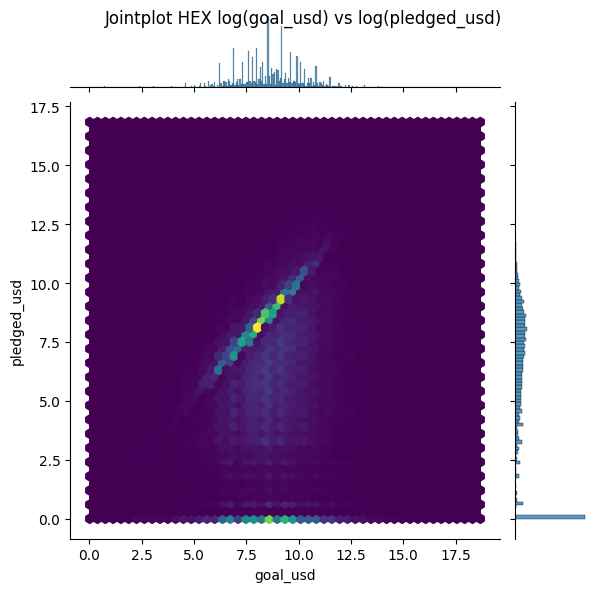

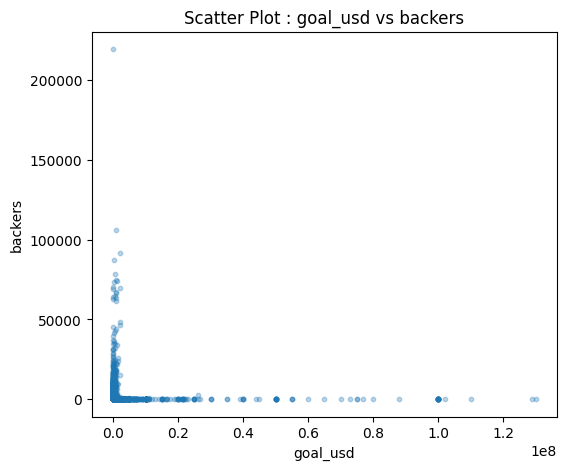

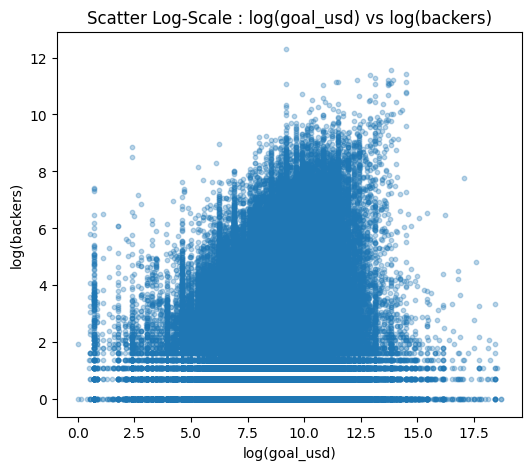

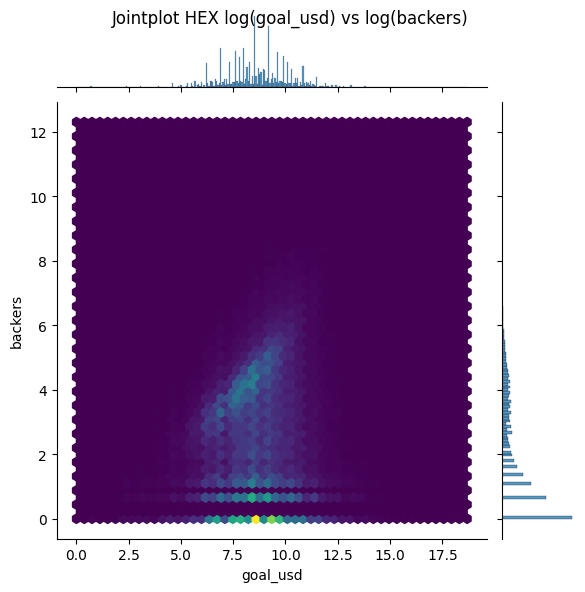

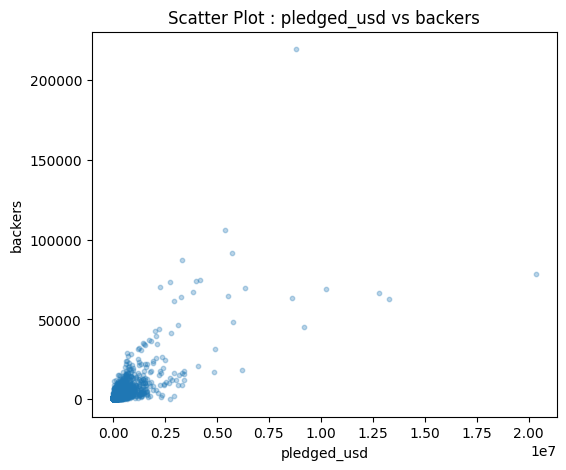

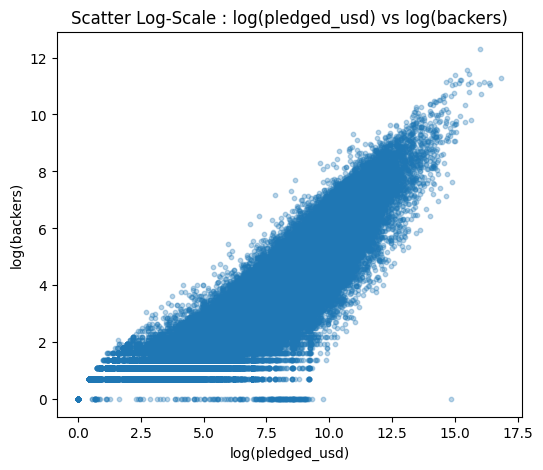

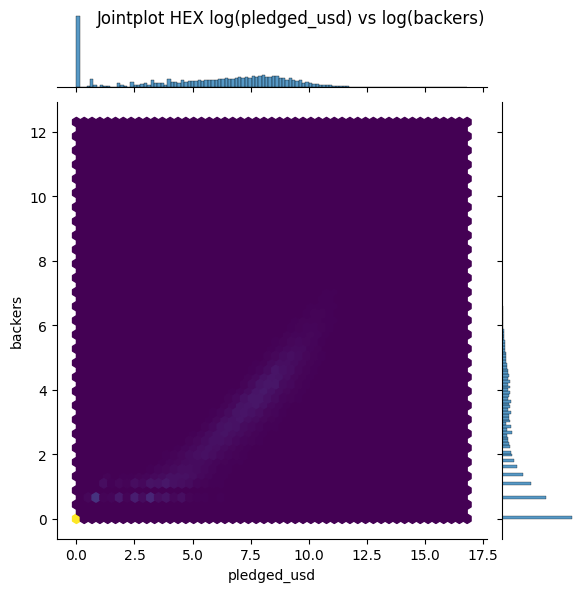

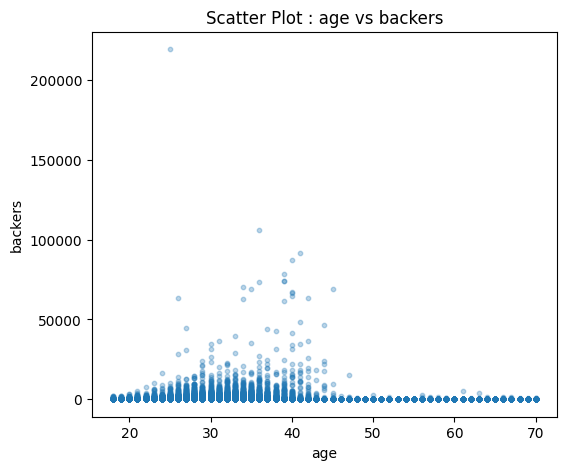

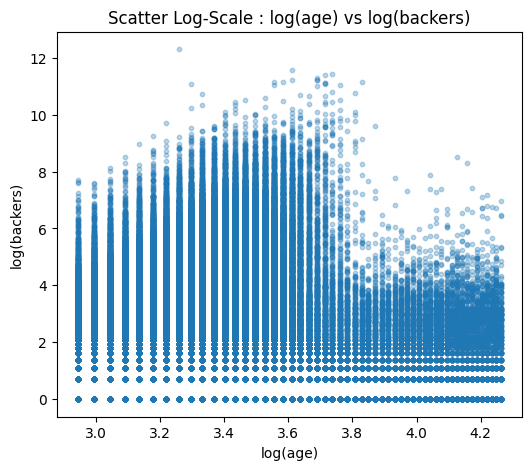

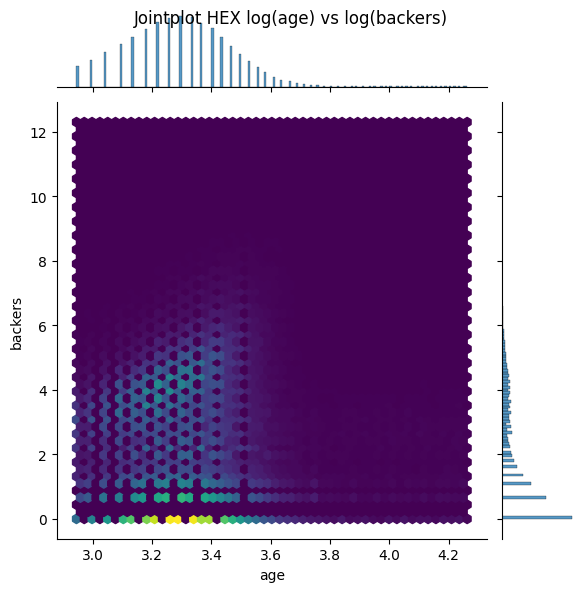

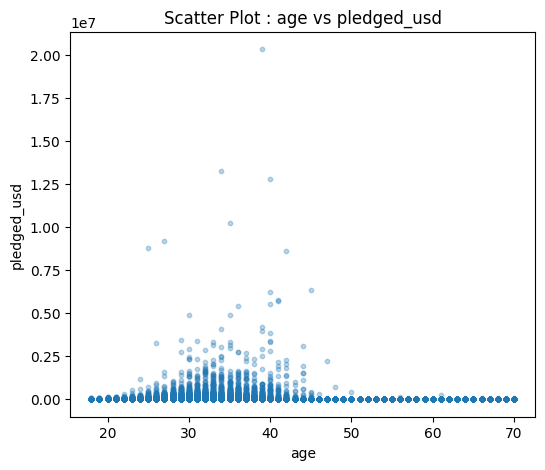

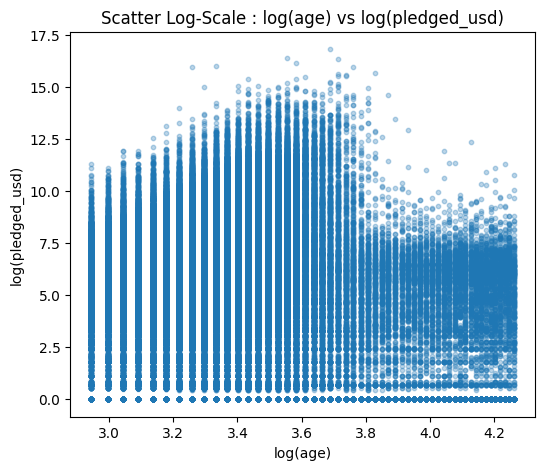

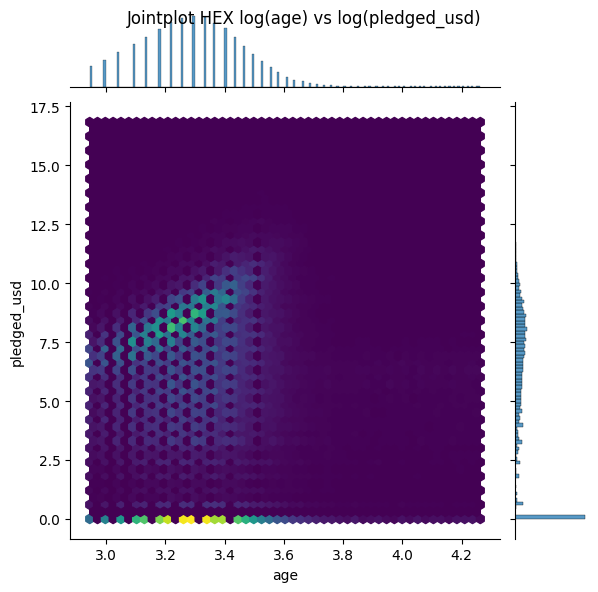

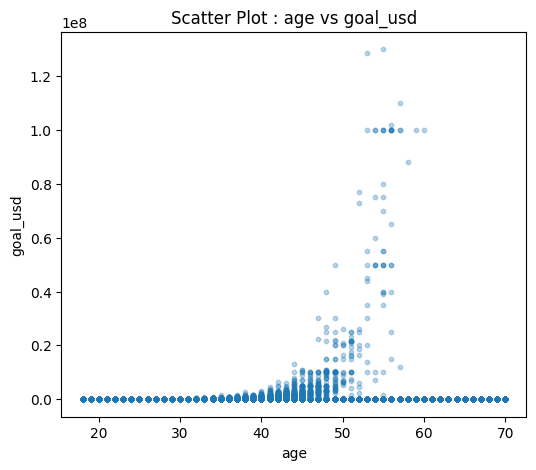

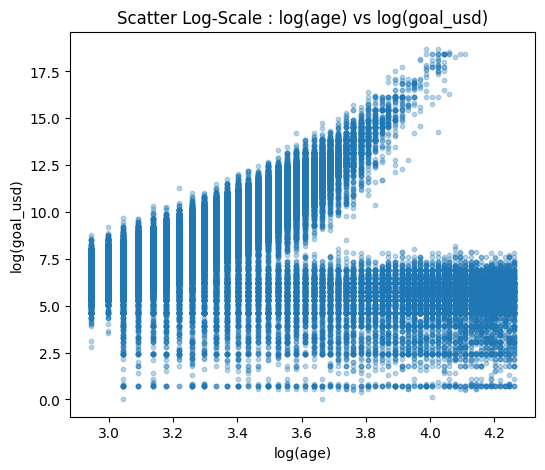

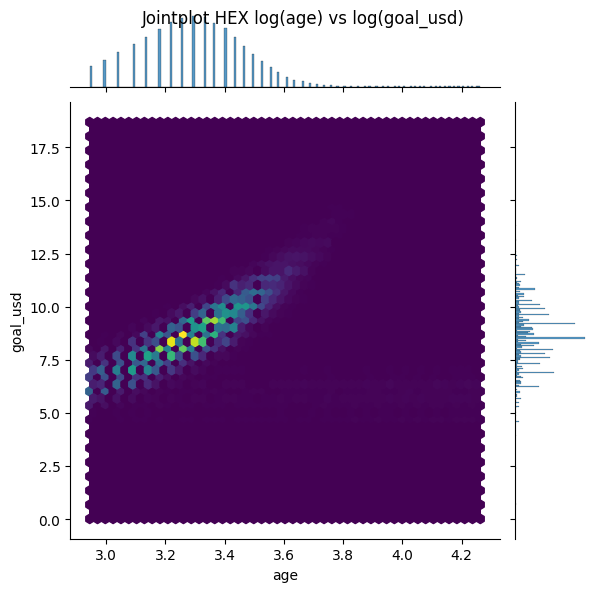

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données nettoyées
df = pd.read_csv("ks-projects-cleaned-state.csv")

# Sélection des variables numériques
num_cols = ["age", "goal_usd", "pledged_usd", "backers"]
data = df[num_cols].dropna()

print("=== CORRÉLATIONS PEARSON ===")
print(data.corr(method="pearson"))
print("\n=== CORRÉLATIONS SPEARMAN ===")
print(data.corr(method="spearman"))

# -------------------------------------------------------------
# 1. HEATMAP DES CORRÉLATIONS
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method="pearson"), annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations (Pearson)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method="spearman"), annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations (Spearman)")
plt.show()

# -------------------------------------------------------------
# 2. PAIRPLOT GLOBAL
# -------------------------------------------------------------
sns.pairplot(data, diag_kind="kde")
plt.show()

# -------------------------------------------------------------
# 3. ASSOCIATIONS INDIVIDUELLES
#    Avec scatter + log-scale + jointplot
# -------------------------------------------------------------

def scatter_with_log(x, y):
    plt.figure(figsize=(6,5))
    plt.scatter(df[x], df[y], alpha=0.3, s=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Scatter Plot : {x} vs {y}")
    plt.show()

    # Version log-scale
    plt.figure(figsize=(6,5))
    plt.scatter(np.log1p(df[x]), np.log1p(df[y]), alpha=0.3, s=10)
    plt.xlabel(f"log({x})")
    plt.ylabel(f"log({y})")
    plt.title(f"Scatter Log-Scale : log({x}) vs log({y})")
    plt.show()

    # Jointplot
    sns.jointplot(x=np.log1p(df[x]), y=np.log1p(df[y]),
                  kind="hex", height=6, cmap="viridis")
    plt.suptitle(f"Jointplot HEX log({x}) vs log({y})")
    plt.show()

# -------------------------------------------------------------
# 3.1 goal_usd ↔ pledged_usd
# -------------------------------------------------------------
scatter_with_log("goal_usd", "pledged_usd")

# -------------------------------------------------------------
# 3.2 goal_usd ↔ backers
# -------------------------------------------------------------
scatter_with_log("goal_usd", "backers")

# -------------------------------------------------------------
# 3.3 pledged_usd ↔ backers
# -------------------------------------------------------------
scatter_with_log("pledged_usd", "backers")

# -------------------------------------------------------------
# 3.4 age ↔ backers
# -------------------------------------------------------------
scatter_with_log("age", "backers")

# -------------------------------------------------------------
# 3.5 age ↔ pledged_usd
# -------------------------------------------------------------
scatter_with_log("age", "pledged_usd")

# -------------------------------------------------------------
# 3.6 age ↔ goal_usd
# -------------------------------------------------------------
scatter_with_log("age", "goal_usd")
